In [1]:
import cv2
import numpy as np 
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import scipy.stats as st
from tqdm.notebook import tqdm_notebook as tqdm

### Funkcje

In [62]:
def conv(img, kernel):
    """
    apply filter
    """
    x = np.shape(img)[0]
    y = np.shape(img)[1]
    output = np.copy(img)
    img_border = set_border(img, kernel)
    for i in tqdm(range(0, x)):
        for j in range(0, y):
            output[i][j] = get_sum(img_border, i, j, kernel)
    return output

def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in tqdm(range(len(data))):
        for j in range(len(data[0])):
            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])
            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

def get_gaussian(kernlen=11, nsig=3):
    """
    returns a 2D Gaussian kernel
    """
    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

def get_lowpass(kernlen=11):
    val=1/(kernlen*kernlen)
    ker = np.ones(kernlen*kernlen).reshape(kernlen, kernlen)
    return ker*val

def set_border(img, kernel):
    """
    returns image copy with border 
    """
    n = int(kernel.shape[0]/2)
    print("setting border to: {}".format(n))
    img_ = img.copy()
    top, bottom, left, right = [n]*4
    img_ = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REPLICATE)
    return img_


def get_sum(img, i, j, kernel):
    """
    calculates sum of applied kernel 
    """
    n, kx, ky, summary = kernel.shape[0], 0, 0, []
    for k in range(int(n/2)*-1, int(n/2)+1):
        for l in range(int(n/2)*-1, int(n/2)+1):
            summary.append(img[i+k][j+l] * kernel[kx][ky])
            ky+= 1
        ky = 0
        kx += 1
    return sum(summary)

def get_binarized(img, th=125):
    '''
    binaryzacja warunkowa
    '''
    return 1.0*(img > th)
    

### Filtry 

In [2]:
filtr_1 = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])

filtr_2 = np.array([[1,2,1],
                    [2,4,2],
                    [1,2,1]])

### zdjęcie oryginalne

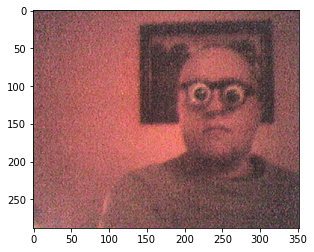

In [59]:
img = io.imread("onise.jpg")
plt.imshow(img);

# ZAD 1b 

### filtr 1

setting border to: 1


  0%|          | 0/288 [00:00<?, ?it/s]

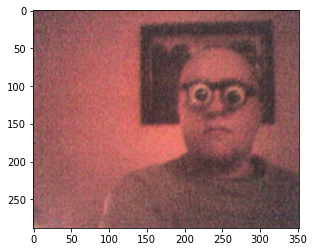

In [8]:
plt.imshow(conv(img, filtr_1*1/9));

### filtr 2

setting border to: 1


  0%|          | 0/288 [00:00<?, ?it/s]

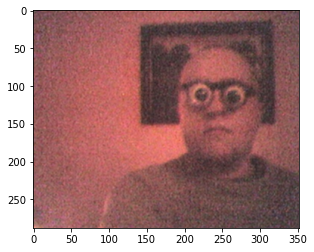

In [9]:
plt.imshow(conv(img, filtr_2*1/16));

### filtr 1xn

In [ ]:
kernel_sizes = [3, 5, 9, 15, 35]
th = 90

kernel size: 3
setting border to: 1


  0%|          | 0/288 [00:00<?, ?it/s]

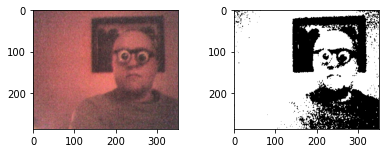

kernel size: 5
setting border to: 2


  0%|          | 0/288 [00:00<?, ?it/s]

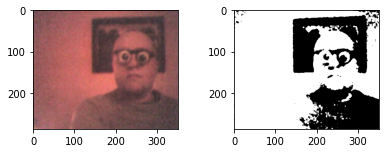

kernel size: 9
setting border to: 4


  0%|          | 0/288 [00:00<?, ?it/s]

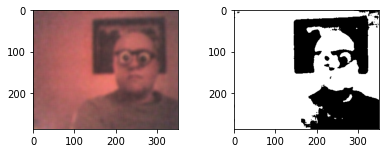

kernel size: 15
setting border to: 7


  0%|          | 0/288 [00:00<?, ?it/s]

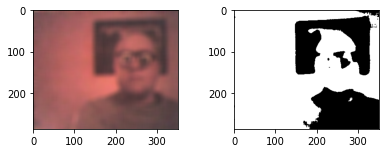

kernel size: 35
setting border to: 17


  0%|          | 0/288 [00:00<?, ?it/s]

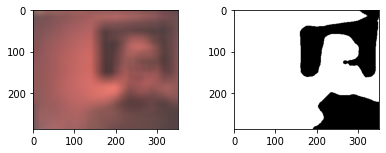

In [67]:
for n in kernel_sizes:
    print("kernel size: {}".format(n))
    fig, axs = plt.subplots(1 ,2)
    ret = conv(img, get_lowpass(n))
    axs[0].imshow(ret);
    axs[1].imshow(get_binarized(cv2.cvtColor(ret, cv2.COLOR_RGB2GRAY), th), cmap='gray');
    fig.tight_layout(pad=3.0)
    plt.show()

### filtr 2xn

kernel size: 3
setting border to: 1


  0%|          | 0/288 [00:00<?, ?it/s]

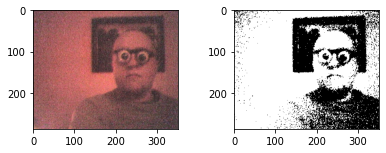

kernel size: 5
setting border to: 2


  0%|          | 0/288 [00:00<?, ?it/s]

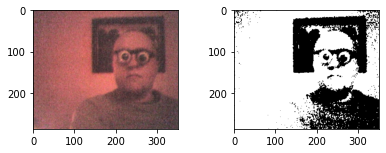

kernel size: 9
setting border to: 4


  0%|          | 0/288 [00:00<?, ?it/s]

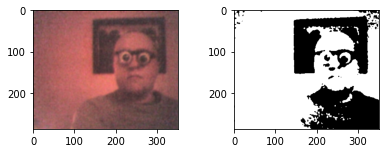

kernel size: 15
setting border to: 7


  0%|          | 0/288 [00:00<?, ?it/s]

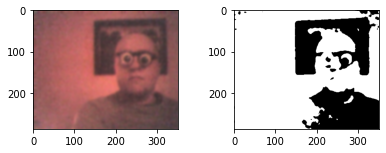

kernel size: 35
setting border to: 17


  0%|          | 0/288 [00:00<?, ?it/s]

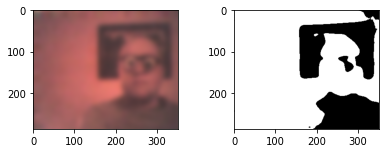

In [70]:
for n in kernel_sizes:
    print("kernel size: {}".format(n))
    fig, axs = plt.subplots(1 ,2)
    ret = conv(img, get_gaussian(n))
    axs[0].imshow(ret);
    axs[1].imshow(get_binarized(cv2.cvtColor(ret, cv2.COLOR_RGB2GRAY), th), cmap='gray');
    fig.tight_layout(pad=3.0)
    plt.show()

# ZAD 2b

### zdjęcie oryginalne

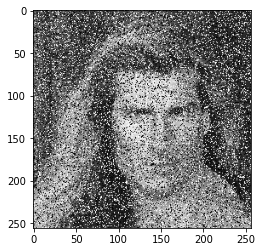

In [47]:
img = Image.open("salt_and_pepper.png").convert("L")
plt.imshow(img, cmap='gray')

### filtr medianowy

  0%|          | 0/256 [00:00<?, ?it/s]

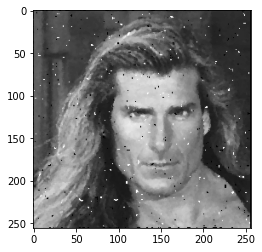

In [50]:
plt.imshow(median_filter(np.array(img), 3), cmap='gray')

  0%|          | 0/256 [00:00<?, ?it/s]

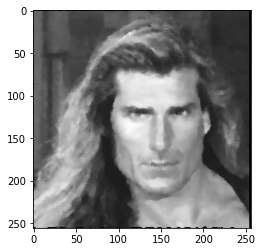

In [52]:
plt.imshow(median_filter(np.array(img), 5), cmap='gray')